In [54]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import numpy as np
import pandas as pd
import collections
from datetime import datetime
from wordcloud import WordCloud

pgm_name = os.path.join(os.path.dirname(os.getcwd()), 'xlsx_data', f"{'xlsx_#1_file_list'}.xlsx")
df = pd.read_excel(pgm_name, index_col=0)

In [55]:
crime_name = os.path.join(os.path.dirname(os.getcwd()), 'xlsx_data', f"{'condition_table'}.xlsx")
crime =  pd.read_excel(crime_name, index_col=0)

In [56]:
crime_list = list(set(crime['title'].values))
crime_list = [item.split('·') for item in crime_list]
crime_list = [item for items in crime_list for item in items]

In [57]:
title_list = list(df['title'].values)

In [58]:
crime_count = [int() for i in range(len(crime_list))]

In [59]:
for t in title_list:
    for i, c in enumerate(crime_list):
        if c in t:
            crime_count[i] += 1

In [60]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = r'C:\Windows\Fonts\batang.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
%matplotlib inline

<BarContainer object of 47 artists>

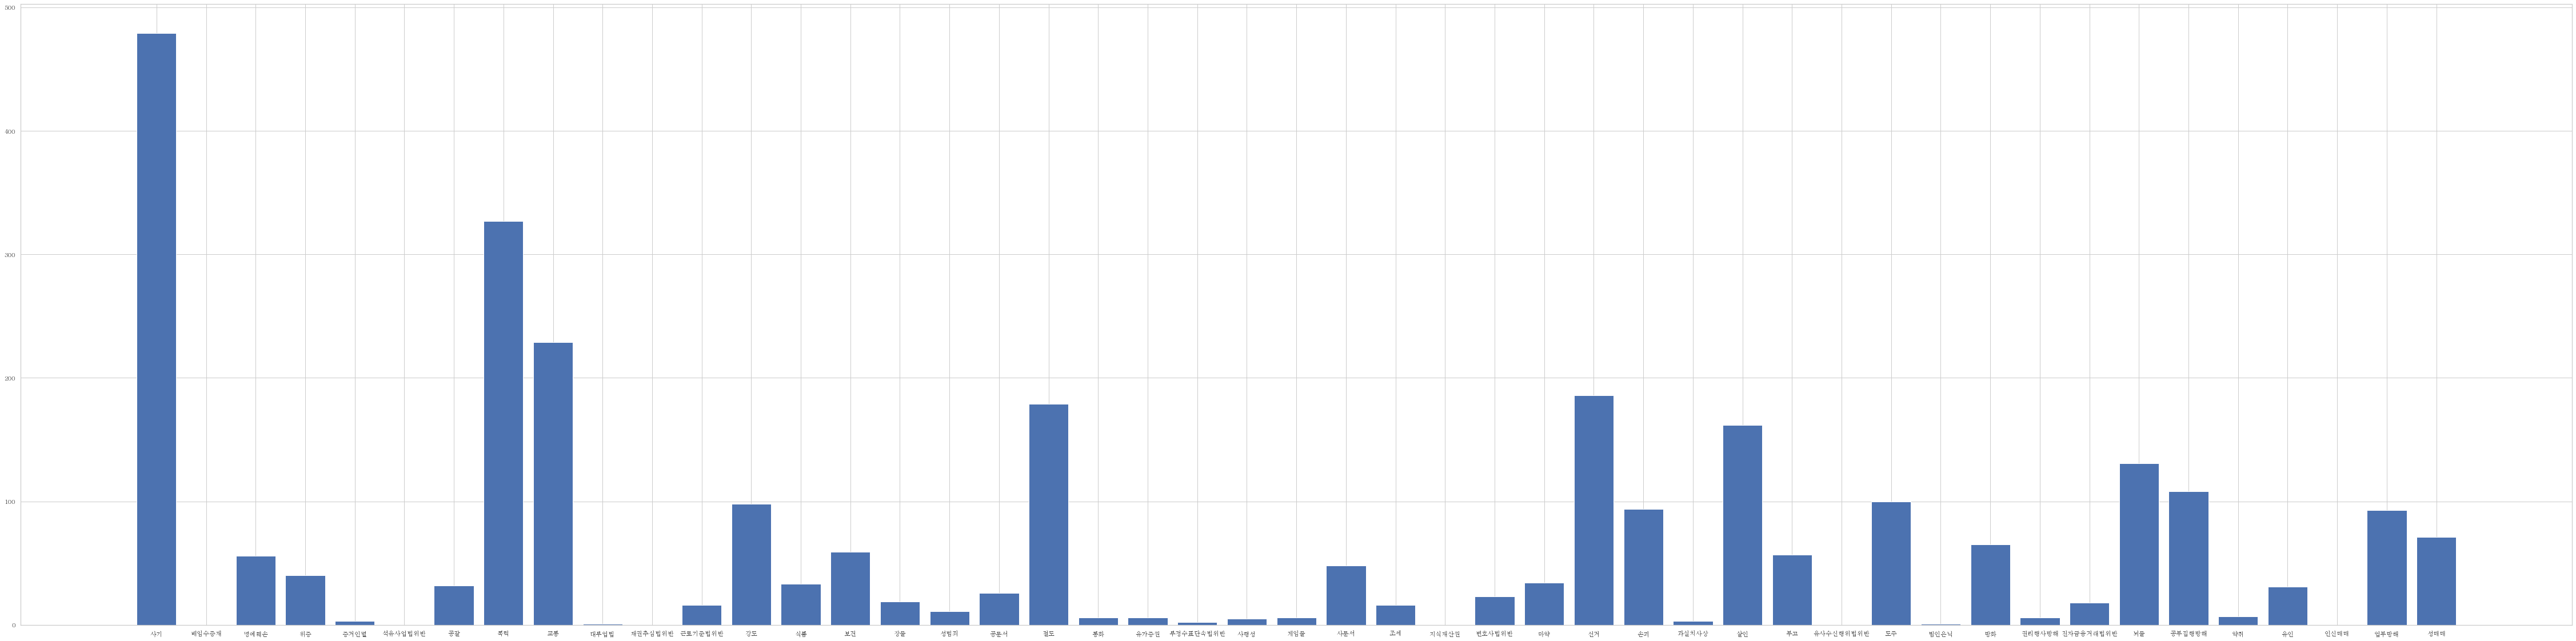

In [61]:
f, ax = plt.subplots(figsize=(80,20))
plt.bar(crime_list, crime_count)

In [66]:
title_list = [t.replace('형사', '') for t in title_list]
train_chat = [chat for chat in title_list if type(chat) is str]

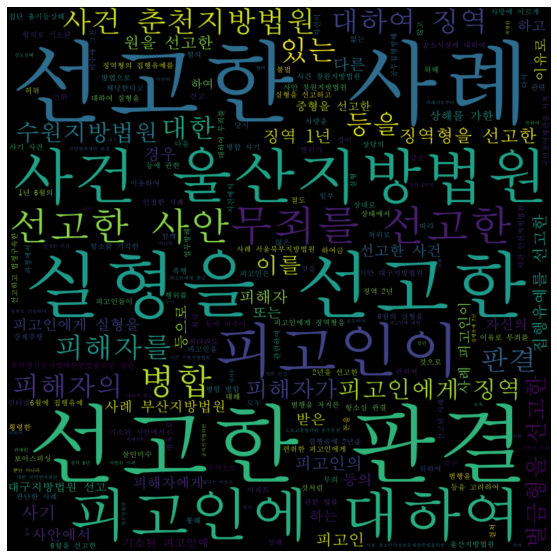

In [67]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, font_path='‪C:\Windows\Fonts\HMKMM.TTF').generate(" ".join(train_chat))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()